# QuadrupoleTrapAnalysis

This Notebook works with the `QuadrupoleTrapSimulation.xml` file located in `${KASPERSYS}/config/Kassiopeia/Examples`. The file contains a model of an quadrupole trap with three electrodes embedded in a magnetic coil.

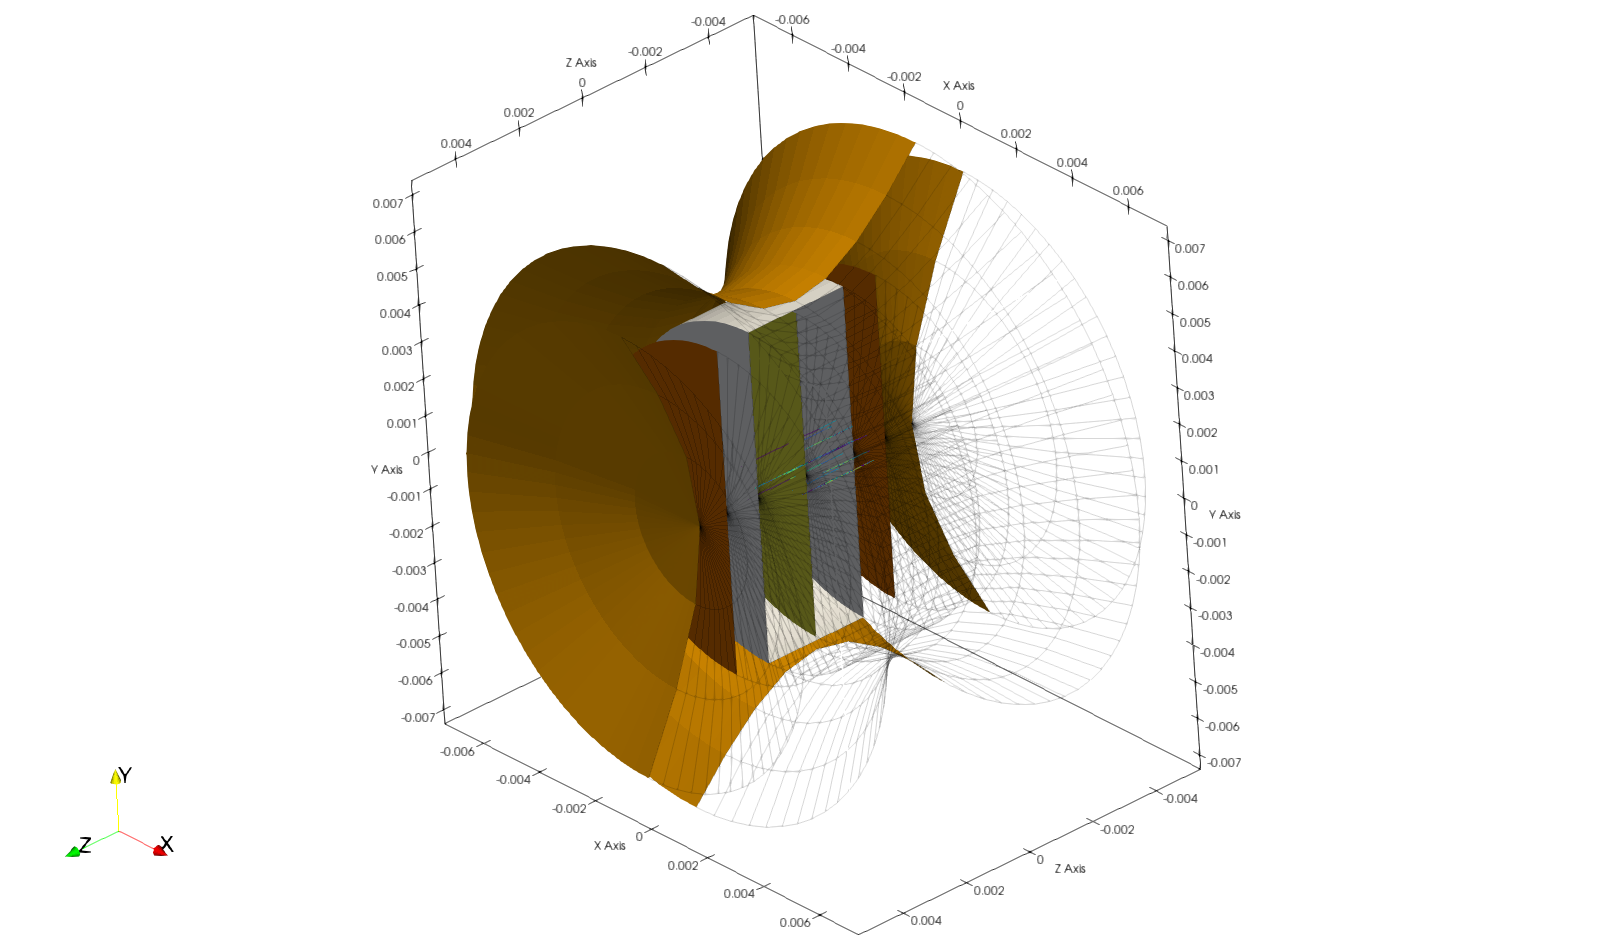


### Run this _Kassiopeia_ command to generate the output file:

```
Kassiopeia ${KASPERSYS}/config/Kassiopeia/Examples/QuadrupoleTrapSimulation.xml
```

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Setup modules

import os
import numpy as np
import pandas as pd
try:
    import uproot3 as uproot  # try this if newer uproot does not work
except ModuleNotFoundError:
    import uproot
import matplotlib.pyplot as plt

WORKDIR = os.path.expandvars('$HOME/kasper.git/install/output/Kassiopeia/')

if not os.path.exists(WORKDIR):
    raise RuntimeError(f"Workspace directory does not exist: {WORKDIR}")

In [3]:
# Open output file

file_name = WORKDIR + 'QuadrupoleTrapSimulation.root'
if not os.path.exists(file_name):
    raise RuntimeError(f"Output file '{file_name}' does not exist. Please run the simulation first.")

data = uproot.open(file_name)

## Method 1

This method uses dataframes to iterate over each output track and process step data in the `component_step_cell` group. The steps that correspond to each track are selected by a boolean mask.

In [4]:
# Read data structures
df0 = data['TRACK_DATA'].pandas.df()
df1 = data['component_step_cell_DATA'].pandas.df()
df1p = data['component_step_cell_PRESENCE'].pandas.df()

# Iterate over tracks and assign to step data
for track_id, first_step_index, last_step_index in zip(df0['TRACK_INDEX'], df0['FIRST_STEP_INDEX'], df0['LAST_STEP_INDEX']):

    step_mask = np.full(df1.shape[0], False)
    
    start_index = 0
    for first_valid, valid_length in zip(df1p['INDEX'], df1p['LENGTH']):
        last_valid = first_valid + valid_length - 1

        if first_valid >= first_step_index and last_valid <= last_step_index:
            step_mask[start_index:start_index+valid_length] = True

        if start_index > last_step_index:
            break

        start_index += valid_length
        
    # Select data of current track
    steps_moment = df1['orbital_magnetic_moment'][step_mask]
    max_moment = np.max(steps_moment)
    min_moment = np.min(steps_moment)
    
    # Compute result
    deviation = 2.0 * (max_moment - min_moment) / (max_moment + min_moment)
    print("extrema for track #{:d} <{:g}>".format(track_id, deviation))


extrema for track #0 <0.000155068>
extrema for track #1 <0.000187115>
extrema for track #2 <0.237179>
extrema for track #3 <0.000142933>
extrema for track #4 <0.00011403>
extrema for track #5 <0.000433223>
extrema for track #6 <0.000301383>
extrema for track #7 <0.000345192>
extrema for track #8 <0.237945>
extrema for track #9 <0.00109405>
extrema for track #10 <0.000236314>
extrema for track #11 <0.77481>
extrema for track #12 <0.000237412>
extrema for track #13 <0.000743343>
extrema for track #14 <0.00014596>
extrema for track #15 <0.000686616>
extrema for track #16 <0.237237>
extrema for track #17 <0.000367224>
extrema for track #18 <0.000112223>
extrema for track #19 <0.000111539>
extrema for track #20 <0.000109241>
extrema for track #21 <0.000109402>
extrema for track #22 <0.000167361>
extrema for track #23 <0.000108809>
extrema for track #24 <1.86673>
extrema for track #25 <0.312676>
extrema for track #26 <0.000135547>
extrema for track #27 <0.000226919>
extrema for track #28 <0.

## Method 2

This method uses dataframes to iterate over each output track and process step data in the `component_step_cell` group. The steps that correspond to each track are selected by the dataframe's `track_id` column. This method allows more complex data selections through the `df.query()` method.

In [5]:
# Read data structures
df0 = data['TRACK_DATA'].pandas.df()
df1 = data['component_step_cell_DATA'].pandas.df()
df1p = data['component_step_cell_PRESENCE'].pandas.df()

# Extend step data for merging
df1.assign(track_id=np.nan)

# Iterate over tracks and assign to step data
for track_id, first_step_index, last_step_index in zip(df0['TRACK_INDEX'], df0['FIRST_STEP_INDEX'], df0['LAST_STEP_INDEX']):

    start_index = 0
    for first_valid, valid_length in zip(df1p['INDEX'], df1p['LENGTH']):
        last_valid = first_valid + valid_length - 1

        if first_valid >= first_step_index and last_valid <= last_step_index:
            df1.loc[start_index:start_index+valid_length-1, ('track_id')] = track_id

        if start_index > last_step_index:
            break

        start_index += valid_length

    # Select data of current track
    steps_moment = df1.query("track_id == @track_id")['orbital_magnetic_moment']
    max_moment = np.max(steps_moment)
    min_moment = np.min(steps_moment)
    
    # Compute result
    deviation = 2.0 * (max_moment - min_moment) / (max_moment + min_moment)
    print("extrema for track #{:d} <{:g}>".format(track_id, deviation))


extrema for track #0 <0.000155068>
extrema for track #1 <0.000187115>
extrema for track #2 <0.237179>
extrema for track #3 <0.000142933>
extrema for track #4 <0.00011403>
extrema for track #5 <0.000433223>
extrema for track #6 <0.000301383>
extrema for track #7 <0.000345192>
extrema for track #8 <0.237945>
extrema for track #9 <0.00109405>
extrema for track #10 <0.000236314>
extrema for track #11 <0.77481>
extrema for track #12 <0.000237412>
extrema for track #13 <0.000743343>
extrema for track #14 <0.00014596>
extrema for track #15 <0.000686616>
extrema for track #16 <0.237237>
extrema for track #17 <0.000367224>
extrema for track #18 <0.000112223>
extrema for track #19 <0.000111539>
extrema for track #20 <0.000109241>
extrema for track #21 <0.000109402>
extrema for track #22 <0.000167361>
extrema for track #23 <0.000108809>
extrema for track #24 <1.86673>
extrema for track #25 <0.312676>
extrema for track #26 <0.000135547>
extrema for track #27 <0.000226919>
extrema for track #28 <0.

## Method 3

This method uses dataframes to iterate over each output track and process step data in the `component_step_cell` group. The steps that correspond to each track are selected by the dataframe's `track_id` column. In contrast to method 2, here we use the `df.groupby()` method to break down the data into individual tracks.

In [6]:
# Read data structures
df0 = data['TRACK_DATA'].pandas.df()
df1 = data['component_step_cell_DATA'].pandas.df()
df1p = data['component_step_cell_PRESENCE'].pandas.df()

# Extend step data for merging
df1.assign(track_id=np.nan)

# Iterate over tracks and assign to step data
for track_id, first_step_index, last_step_index in zip(df0['TRACK_INDEX'], df0['FIRST_STEP_INDEX'], df0['LAST_STEP_INDEX']):

    start_index = 0
    for first_valid, valid_length in zip(df1p['INDEX'], df1p['LENGTH']):
        last_valid = first_valid + valid_length - 1

        if first_valid >= first_step_index and last_valid <= last_step_index:
            df1.loc[start_index:start_index+valid_length-1, ('track_id')] = track_id

        if start_index > last_step_index:
            break

        start_index += valid_length

# Iterate over tracks and compute the results
for track_id, group in df1.groupby("track_id"):
    
    # Here we can refer to each group's output fields individually
    steps_moment = group.orbital_magnetic_moment
    max_moment = np.max(steps_moment)
    min_moment = np.min(steps_moment)

    deviation = 2.0 * (max_moment - min_moment) / (max_moment + min_moment)
    print("extrema for track #{:d} <{:g}>".format(int(track_id), deviation))


extrema for track #0 <0.000155068>
extrema for track #1 <0.000187115>
extrema for track #2 <0.237179>
extrema for track #3 <0.000142933>
extrema for track #4 <0.00011403>
extrema for track #5 <0.000433223>
extrema for track #6 <0.000301383>
extrema for track #7 <0.000345192>
extrema for track #8 <0.237945>
extrema for track #9 <0.00109405>
extrema for track #10 <0.000236314>
extrema for track #11 <0.77481>
extrema for track #12 <0.000237412>
extrema for track #13 <0.000743343>
extrema for track #14 <0.00014596>
extrema for track #15 <0.000686616>
extrema for track #16 <0.237237>
extrema for track #17 <0.000367224>
extrema for track #18 <0.000112223>
extrema for track #19 <0.000111539>
extrema for track #20 <0.000109241>
extrema for track #21 <0.000109402>
extrema for track #22 <0.000167361>
extrema for track #23 <0.000108809>
extrema for track #24 <1.86673>
extrema for track #25 <0.312676>
extrema for track #26 <0.000135547>
extrema for track #27 <0.000226919>
extrema for track #28 <0.

## Method 4

This method uses dataframes to iterate over each output track and process step data in the `component_step_cell` and `component_step_world` group. The step groups are first merged into a combined data frame, which is then joined with the track data in the `component_track_world` group. This allows to select data fields on the track and step level together. The steps that correspond to each track are selected by the dataframe's `track_id` column. Again, we use the `df.groupby()` method to break down the data into individual tracks.

In [7]:
# Read data structures
df0 = data['TRACK_DATA'].pandas.df()
df1 = data['component_track_world_DATA'].pandas.df()
df2 = data['component_step_world_DATA'].pandas.df()
df3 = data['component_step_cell_DATA'].pandas.df()
df2p = data['component_step_world_PRESENCE'].pandas.df()
df3p = data['component_step_cell_PRESENCE'].pandas.df()

# Extend step data for merging
df1 = df1.assign(track_id=df0['TRACK_INDEX'])
df2 = df2.assign(track_id=np.nan, step_id=np.nan)
df3 = df3.assign(track_id=np.nan, step_id=np.nan)

# Iterate over tracks and assign to step data
for track_id, first_step_index, last_step_index in zip(df0['TRACK_INDEX'], df0['FIRST_STEP_INDEX'], df0['LAST_STEP_INDEX']):

    start_index = 0
    for first_valid, valid_length in zip(df2p['INDEX'], df2p['LENGTH']):
        last_valid = first_valid + valid_length - 1

        if first_valid >= first_step_index and last_valid <= last_step_index:
            df2.loc[start_index:start_index+valid_length-1, ('track_id')] = track_id
            df2.loc[start_index:start_index+valid_length-1, ('step_id')] = np.arange(first_valid, last_valid+1)

        if first_valid > last_step_index:
            break

        start_index += valid_length

    start_index = 0
    for first_valid, valid_length in zip(df3p['INDEX'], df3p['LENGTH']):
        last_valid = first_valid + valid_length - 1

        if first_valid >= first_step_index and last_valid <= last_step_index:
            df3.loc[start_index:start_index+valid_length-1, ('track_id')] = track_id
            df3.loc[start_index:start_index+valid_length-1, ('step_id')] = np.arange(first_valid, last_valid+1)

        if first_valid > last_step_index:
            break

        start_index += valid_length

# Assign indices for merging
df1.set_index('track_id')
df2.set_index(['track_id', 'step_id'])
df3.set_index(['track_id', 'step_id'])

# Merge the step data frames (append columns)
#   `inner` join: keep only steps that exist in *both* data frames
#   `outer` join: keep all steps, even those that only exist in one data frame
df4 = pd.merge(df2, df3, on=('track_id','step_id'), how='outer')
df4.set_index(['track_id', 'step_id'])

# Merge the track data frame (merge columns via common `track_id`)
df = pd.merge(df4, df1, on='track_id', how='outer')
df.set_index(['track_id', 'step_id'])

for track_id,group in df.groupby("track_id"):
    
    # Here we can refer to each group's output fields individually
    steps_moment = group.orbital_magnetic_moment
    max_moment = np.max(steps_moment)
    min_moment = np.min(steps_moment)
    
    # We can also accees data from the other step output group
    magnetic_field = group.magnetic_field_z.max()
    
    # ... and the track output group as well.
    kinetic_energy = group.initial_kinetic_energy.mean()

    deviation = 2.0 * (max_moment - min_moment) / (max_moment + min_moment)
    print("extrema for track #{:d} <{:g}>, with max. magnetic field <{:g}> and initial energy <{:g}>".\
          format(int(track_id), deviation, magnetic_field, kinetic_energy))


extrema for track #0 <0.000155068>, with max. magnetic field <5.88439> and initial energy <2>
extrema for track #1 <0.000187115>, with max. magnetic field <5.88446> and initial energy <4.10653>
extrema for track #2 <0.237179>, with max. magnetic field <5.88452> and initial energy <4.4373>
extrema for track #3 <0.000142933>, with max. magnetic field <5.88452> and initial energy <3.71827>
extrema for track #4 <0.00011403>, with max. magnetic field <5.88452> and initial energy <3.70663>
extrema for track #5 <0.000433223>, with max. magnetic field <5.88452> and initial energy <3.71804>
extrema for track #6 <0.000301383>, with max. magnetic field <5.88445> and initial energy <2>
extrema for track #7 <0.000345192>, with max. magnetic field <5.88445> and initial energy <4.28543>
extrema for track #8 <0.237945>, with max. magnetic field <5.88455> and initial energy <4.29225>
extrema for track #9 <0.00109405>, with max. magnetic field <5.88455> and initial energy <3.71866>
extrema for track #10

### Internally used dataframes

The dataframes below contain all the output data and can be used for arbitary data selection and processing.

In [8]:
df0

,TRACK_INDEX,FIRST_STEP_INDEX,LAST_STEP_INDEX
entry,,,
0,0,0,10288
1,1,10289,14271
2,2,14272,25434
3,3,25435,27943
4,4,27944,41833
...,...,...,...
105,105,1126460,1137451
106,106,1137452,1141234
107,107,1141235,1163684


In [9]:
df1

,creator_name,terminator_name,total_steps,initial_time,initial_position_x,initial_position_y,initial_position_z,initial_momentum_x,initial_momentum_y,initial_momentum_z,...,final_electric_field_z,final_electric_potential,final_kinetic_energy,final_polar_angle_to_z,final_azimuthal_angle_to_x,final_polar_angle_to_b,final_orbital_magnetic_moment,z_length_internal,z_length_integral,track_id
entry,,,,,,,,,,,,,,,,,,,,,
0,b'generator_uniform',b'int_scattering',10289,0.000000e+00,-0.000395,-0.000195,-0.002500,-5.855381e-25,4.908563e-25,4.678546e-41,...,-1.032568e+03,4.459610,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731,0
1,b'(anonymous)',b'int_scattering',3983,2.755610e-09,-0.000394,-0.000195,-0.001185,6.163079e-25,-1.459890e-25,8.930512e-25,...,-7.001976e+02,4.790381,4.437248,33.813264,65.421255,33.813007,3.741323e-20,0.000464,0.000464,1
2,b'(anonymous)',b'nav_surface:surface_target:transmission',11163,3.133419e-09,-0.000394,-0.000195,-0.000803,9.250647e-25,1.256951e-25,6.509185e-25,...,-8.744292e-09,5.071406,3.718272,52.699416,149.882484,52.699416,6.405996e-20,0.001350,0.001350,2
3,b'nav_surface:surface_target:transmission',b'int_scattering',2509,4.192153e-09,-0.000393,-0.000193,0.000000,-7.168421e-25,4.158317e-25,6.313296e-25,...,1.435965e+02,5.059757,3.706624,52.820479,217.382335,52.820413,6.406466e-20,0.000272,0.000272,3
4,b'(anonymous)',b'int_scattering',13890,4.430148e-09,-0.000394,-0.000193,0.000165,8.284870e-25,-6.236188e-25,-8.164776e-26,...,2.646804e+01,5.071182,3.718049,95.508851,328.649754,95.508858,1.002986e-19,0.001506,0.001506,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,b'(anonymous)',b'nav_surface:surface_target:transmission',10992,4.580589e-08,-0.000108,0.000223,0.000705,8.836800e-26,8.222978e-25,-5.815529e-25,...,-8.948212e-09,5.042938,2.718637,127.457163,346.049075,127.457163,4.664267e-20,0.001180,0.001180,105
106,b'nav_surface:surface_target:transmission',b'int_scattering',3783,4.684843e-08,-0.000109,0.000222,0.000000,6.862829e-25,-1.704853e-25,-5.417695e-25,...,-1.854509e+02,5.023200,2.698900,127.183785,19.798313,127.183780,4.664216e-20,0.000350,0.000350,106
107,b'(anonymous)',b'int_scattering',22450,4.720724e-08,-0.000109,0.000222,-0.000213,-1.727572e-25,7.923652e-25,-3.607110e-25,...,-7.772407e+02,4.696180,2.371880,102.934196,17.914221,102.934166,6.134466e-20,0.002017,0.002017,107


In [10]:
df2

,step_id,continuous_time,continuous_length,time,position_x,position_y,position_z,momentum_x,momentum_y,momentum_z,magnetic_field_x,magnetic_field_y,magnetic_field_z,electric_field_x,electric_field_y,electric_field_z,electric_potential,kinetic_energy,track_id
entry,,,,,,,,,,,,,,,,,,,
0,0.0,3.794667e-13,3.182840e-07,3.794667e-13,-0.000395,-0.000194,-0.002500,-7.288185e-25,2.294092e-25,1.363769e-28,0.000096,0.000047,5.883916,174.266780,85.749975,-2170.178971,2.353168,2.000035,0.0
1,1.0,3.794667e-13,3.182876e-07,7.589334e-13,-0.000395,-0.000194,-0.002500,-7.611409e-25,-6.696744e-26,2.712237e-28,0.000096,0.000047,5.883916,174.401945,85.733130,-2170.172812,2.353220,2.000087,0.0
2,2.0,3.794667e-13,3.182921e-07,1.138400e-12,-0.000396,-0.000194,-0.002500,-6.775845e-25,-3.531530e-25,4.040963e-28,0.000096,0.000047,5.883916,174.531749,85.770216,-2170.165590,2.353281,2.000148,0.0
3,3.0,3.794667e-13,3.182970e-07,1.517867e-12,-0.000396,-0.000195,-0.002500,-4.908700e-25,-5.855783e-25,5.348512e-28,0.000096,0.000047,5.883916,174.636429,85.855583,-2170.158388,2.353341,2.000209,0.0
4,4.0,3.794667e-13,3.183015e-07,1.897334e-12,-0.000396,-0.000195,-0.002500,-2.294229e-25,-7.288588e-25,6.636673e-28,0.000096,0.000047,5.883916,174.700050,85.976234,-2170.152276,2.353392,2.000260,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203750,1203750.0,3.794520e-13,2.251588e-07,5.372677e-08,-0.000109,0.000221,-0.001986,2.694636e-25,-7.288166e-26,-4.628208e-25,0.000021,-0.000043,5.884133,47.109581,-95.612187,-1726.788359,3.325083,1.000782,109.0
1203751,1203751.0,3.794520e-13,2.251204e-07,5.372715e-08,-0.000109,0.000221,-0.001987,2.768397e-25,3.579137e-26,-4.627151e-25,0.000021,-0.000043,5.884133,47.059767,-95.608962,-1726.955168,3.324744,1.000443,109.0
1203752,1203752.0,3.794520e-13,2.250825e-07,5.372753e-08,-0.000109,0.000221,-0.001987,2.420670e-25,1.390149e-25,-4.626092e-25,0.000021,-0.000043,5.884133,47.012444,-95.625066,-1727.121908,3.324410,1.000109,109.0


In [11]:
df3

,polar_angle_to_z,polar_angle_to_b,guiding_center_position_x,guiding_center_position_y,guiding_center_position_z,orbital_magnetic_moment,track_id,step_id
entry,,,,,,,,
0,47.008965,47.008648,-0.000395,-0.000195,-0.0015,5.445992e-20,0.0,6254.0
1,47.008064,47.007801,-0.000395,-0.000195,-0.0015,5.445972e-20,0.0,6255.0
2,47.007170,47.006964,-0.000395,-0.000195,-0.0015,5.445957e-20,0.0,6256.0
3,47.006285,47.006137,-0.000395,-0.000195,-0.0015,5.445945e-20,0.0,6257.0
4,47.005408,47.005320,-0.000395,-0.000195,-0.0015,5.445937e-20,0.0,6258.0
...,...,...,...,...,...,...,...,...
1081329,156.927623,156.927919,-0.000109,0.000221,-0.0015,7.269994e-21,109.0,1201674.0
1081330,156.926918,156.927195,-0.000109,0.000221,-0.0015,7.270063e-21,109.0,1201675.0
1081331,156.926223,156.926477,-0.000109,0.000221,-0.0015,7.270128e-21,109.0,1201676.0


In [12]:
df4

,step_id,continuous_time,continuous_length,time,position_x,position_y,position_z,momentum_x,momentum_y,momentum_z,...,electric_field_z,electric_potential,kinetic_energy,track_id,polar_angle_to_z,polar_angle_to_b,guiding_center_position_x,guiding_center_position_y,guiding_center_position_z,orbital_magnetic_moment
0,0.0,3.794667e-13,3.182840e-07,3.794667e-13,-0.000395,-0.000194,-0.002500,-7.288185e-25,2.294092e-25,1.363769e-28,...,-2170.178971,2.353168,2.000035,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,3.794667e-13,3.182876e-07,7.589334e-13,-0.000395,-0.000194,-0.002500,-7.611409e-25,-6.696744e-26,2.712237e-28,...,-2170.172812,2.353220,2.000087,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,3.794667e-13,3.182921e-07,1.138400e-12,-0.000396,-0.000194,-0.002500,-6.775845e-25,-3.531530e-25,4.040963e-28,...,-2170.165590,2.353281,2.000148,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3.794667e-13,3.182970e-07,1.517867e-12,-0.000396,-0.000195,-0.002500,-4.908700e-25,-5.855783e-25,5.348512e-28,...,-2170.158388,2.353341,2.000209,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,3.794667e-13,3.183015e-07,1.897334e-12,-0.000396,-0.000195,-0.002500,-2.294229e-25,-7.288588e-25,6.636673e-28,...,-2170.152276,2.353392,2.000260,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203750,1203750.0,3.794520e-13,2.251588e-07,5.372677e-08,-0.000109,0.000221,-0.001986,2.694636e-25,-7.288166e-26,-4.628208e-25,...,-1726.788359,3.325083,1.000782,109.0,NaN,NaN,NaN,NaN,NaN,NaN
1203751,1203751.0,3.794520e-13,2.251204e-07,5.372715e-08,-0.000109,0.000221,-0.001987,2.768397e-25,3.579137e-26,-4.627151e-25,...,-1726.955168,3.324744,1.000443,109.0,NaN,NaN,NaN,NaN,NaN,NaN
1203752,1203752.0,3.794520e-13,2.250825e-07,5.372753e-08,-0.000109,0.000221,-0.001987,2.420670e-25,1.390149e-25,-4.626092e-25,...,-1727.121908,3.324410,1.000109,109.0,NaN,NaN,NaN,NaN,NaN,NaN
1203753,1203753.0,3.794520e-13,2.250452e-07,5.372791e-08,-0.000109,0.000221,-0.001987,1.704393e-25,2.210740e-25,-4.625034e-25,...,-1727.288575,3.324080,0.999779,109.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df

,step_id,continuous_time,continuous_length,time,position_x,position_y,position_z,momentum_x,momentum_y,momentum_z,...,final_electric_field_y,final_electric_field_z,final_electric_potential,final_kinetic_energy,final_polar_angle_to_z,final_azimuthal_angle_to_x,final_polar_angle_to_b,final_orbital_magnetic_moment,z_length_internal,z_length_integral
0,0.0,3.794667e-13,3.182840e-07,3.794667e-13,-0.000395,-0.000194,-0.002500,-7.288185e-25,2.294092e-25,1.363769e-28,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
1,1.0,3.794667e-13,3.182876e-07,7.589334e-13,-0.000395,-0.000194,-0.002500,-7.611409e-25,-6.696744e-26,2.712237e-28,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
2,2.0,3.794667e-13,3.182921e-07,1.138400e-12,-0.000396,-0.000194,-0.002500,-6.775845e-25,-3.531530e-25,4.040963e-28,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
3,3.0,3.794667e-13,3.182970e-07,1.517867e-12,-0.000396,-0.000195,-0.002500,-4.908700e-25,-5.855783e-25,5.348512e-28,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
4,4.0,3.794667e-13,3.183015e-07,1.897334e-12,-0.000396,-0.000195,-0.002500,-2.294229e-25,-7.288588e-25,6.636673e-28,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203750,1203750.0,3.794520e-13,2.251588e-07,5.372677e-08,-0.000109,0.000221,-0.001986,2.694636e-25,-7.288166e-26,-4.628208e-25,...,-95.65807,-1727.288575,3.32408,0.999779,148.886596,52.369201,148.886800,7.268768e-21,0.000954,0.000954
1203751,1203751.0,3.794520e-13,2.251204e-07,5.372715e-08,-0.000109,0.000221,-0.001987,2.768397e-25,3.579137e-26,-4.627151e-25,...,-95.65807,-1727.288575,3.32408,0.999779,148.886596,52.369201,148.886800,7.268768e-21,0.000954,0.000954
1203752,1203752.0,3.794520e-13,2.250825e-07,5.372753e-08,-0.000109,0.000221,-0.001987,2.420670e-25,1.390149e-25,-4.626092e-25,...,-95.65807,-1727.288575,3.32408,0.999779,148.886596,52.369201,148.886800,7.268768e-21,0.000954,0.000954
1203753,1203753.0,3.794520e-13,2.250452e-07,5.372791e-08,-0.000109,0.000221,-0.001987,1.704393e-25,2.210740e-25,-4.625034e-25,...,-95.65807,-1727.288575,3.32408,0.999779,148.886596,52.369201,148.886800,7.268768e-21,0.000954,0.000954


In [14]:
df.query("track_id == 0")

,step_id,continuous_time,continuous_length,time,position_x,position_y,position_z,momentum_x,momentum_y,momentum_z,...,final_electric_field_y,final_electric_field_z,final_electric_potential,final_kinetic_energy,final_polar_angle_to_z,final_azimuthal_angle_to_x,final_polar_angle_to_b,final_orbital_magnetic_moment,z_length_internal,z_length_integral
0,0.0,3.794667e-13,3.182840e-07,3.794667e-13,-0.000395,-0.000194,-0.002500,-7.288185e-25,2.294092e-25,1.363769e-28,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
1,1.0,3.794667e-13,3.182876e-07,7.589334e-13,-0.000395,-0.000194,-0.002500,-7.611409e-25,-6.696744e-26,2.712237e-28,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
2,2.0,3.794667e-13,3.182921e-07,1.138400e-12,-0.000396,-0.000194,-0.002500,-6.775845e-25,-3.531530e-25,4.040963e-28,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
3,3.0,3.794667e-13,3.182970e-07,1.517867e-12,-0.000396,-0.000195,-0.002500,-4.908700e-25,-5.855783e-25,5.348512e-28,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
4,4.0,3.794667e-13,3.183015e-07,1.897334e-12,-0.000396,-0.000195,-0.002500,-2.294229e-25,-7.288588e-25,6.636673e-28,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10284,10284.0,9.485950e-14,1.140052e-07,2.755257e-09,-0.000394,-0.000195,-0.001185,2.052534e-25,7.360213e-25,7.840595e-25,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
10285,10285.0,9.485950e-14,1.140062e-07,2.755352e-09,-0.000394,-0.000195,-0.001185,1.321201e-25,7.525935e-25,7.840757e-25,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
10286,10286.0,9.485950e-14,1.140073e-07,2.755447e-09,-0.000394,-0.000195,-0.001185,5.771464e-26,7.619176e-25,7.840920e-25,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
10287,10287.0,9.485950e-14,1.140083e-07,2.755542e-09,-0.000394,-0.000195,-0.001185,-1.724647e-26,7.639038e-25,7.841082e-25,...,84.83693,-1032.568361,4.45961,4.106477,44.259524,91.293333,44.259316,5.445971e-20,0.002731,0.002731
